<a href="https://colab.research.google.com/github/jithendra1798/ML-CS-GY-6923-B/blob/main/05_ml_cs_gy_6923_b_lab_04_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lab 4: Fitting an MLP to regression data

In this lab, you will implement and a train a simple neural network in PyTorch. Then, you will study how the function approximation capabilities of this model are affected by the model width and depth.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

Let's create some regression data using a complicated function. There will be no test data, just the train set that we will try to fit.

Text(0, 0.5, 'y')

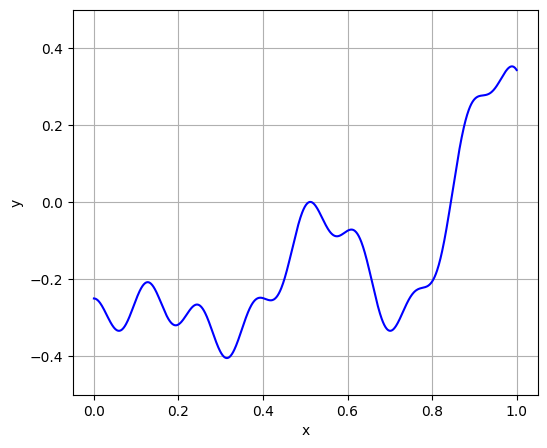

In [2]:
def f(x):
  return 0.2 + 0.4 * x**2 + 0.3 * x * torch.sin(15 * x)+ 0.05 * torch.cos(50*x) - 0.5

x = torch.linspace(0, 1, 1000)
fs = f(x)

_, ax = plt.subplots(1, 1, figsize=(6, 5))

ax.plot(x, fs, "-b")
ax.grid()
ax.set_ylim([-0.5, 0.5])
ax.set_xlabel("x")
ax.set_ylabel("y")


Complete the function below. See the docstring for detailed instructions. Make sure that the training works and you get a reasonable fit when you run the function with the provided parameters.

Sequential(
  (0): Linear(in_features=1, out_features=256, bias=True)
  (1): Tanh()
  (2): Linear(in_features=256, out_features=256, bias=True)
  (3): Tanh()
  (4): Linear(in_features=256, out_features=1, bias=True)
)
Epoch    0/1000 | MSE: 0.075851
Epoch    1/1000 | MSE: 40.030010
Epoch  100/1000 | MSE: 0.016795
Epoch  200/1000 | MSE: 0.012148
Epoch  300/1000 | MSE: 0.010204
Epoch  400/1000 | MSE: 0.009128
Epoch  500/1000 | MSE: 0.008308
Epoch  600/1000 | MSE: 0.007292
Epoch  700/1000 | MSE: 0.005672
Epoch  800/1000 | MSE: 0.003600
Epoch  900/1000 | MSE: 0.002067


Text(0, 0.5, 'y')

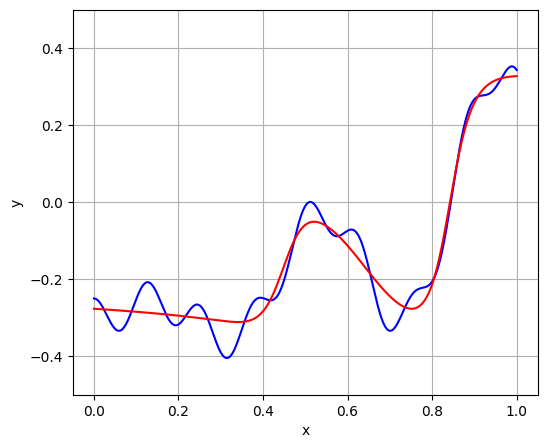

In [3]:
def train_model(
    x: torch.Tensor,
    y: torch.Tensor,
    width: int,
    num_hidden_layers: int,
    epochs: int = 1000,
    activation=nn.ReLU,
    lr: float=0.01,
    ):
  """
    Train a fully connected neural network for regression tasks using PyTorch.

    This function constructs a feedforward neural network with a specified architecture,
    trains it using the Adam optimizer and mean squared error loss, and returns both
    the trained model and its predictions on the input data.

    Architecture:
        - Input layer: Linear(1, width) → Activation
        - Hidden layers: [Linear(width, width) → Activation] × num_hidden_layers
        - Output layer: Linear(width, 1) (no activation)

    The network expects 1-dimensional input features and produces scalar outputs.

    Parameters
    ----------
    x : torch.Tensor
        Input training data of shape (n_samples, 1) or (n_samples,).
        Each sample should contain a single feature value.

    y : torch.Tensor
        Target training labels of shape (n_samples,).
        Ground truth values for the regression task.

    width : int
        Number of neurons in each hidden layer.

    num_hidden_layers : int
        Number of hidden layers in the network (not counting input/output layers).

    epochs : int, optional (default=1000)
        Number of complete passes through the training dataset.

    activation : torch.nn.Module class, optional (default=nn.ReLU)
        Activation function class to use after each linear layer except the output.
        Common choices: nn.ReLU, nn.Sigmoid, nn.Tanh, nn.LeakyReLU.
        Should be passed as a class (not an instance), e.g., nn.ReLU, not nn.ReLU().

    lr : float, optional (default=0.01)
        Learning rate for the Adam optimizer.

    Returns
    -------
    model : torch.nn.Sequential
        The trained neural network model in evaluation mode. Can be used for
        inference on new data via model(new_x).

    final_pred : torch.Tensor
        Model predictions on the input data x, detached from the computation graph.
        Shape: (n_samples,). Useful for immediate visualization or evaluation.

    Training Details
    ----------------
    - Optimizer: Adam
    - Loss function: Mean Squared Error (MSE)

  """
  x_in = x.reshape(-1, 1).float()
  y_in = y.reshape(-1, 1).float()
  layers = [nn.Linear(1, width), activation()]
  for _ in range(num_hidden_layers):
    layers += [nn.Linear(width, width), activation()]
  layers += [nn.Linear(width, 1)]

  model = nn.Sequential(*layers)
  print(model)

  # Optimizer & loss
  optimizer = optim.Adam(model.parameters(), lr=lr)
  loss_fn = nn.MSELoss()

  model.train()
  for epoch in range(epochs):
    optimizer.zero_grad()
    preds = model(x_in)
    loss = loss_fn(preds, y_in)
    loss.backward()
    optimizer.step()

    # Light progress print
    if epoch % max(epochs // 10, 1) == 0 or epoch == 1:
        print(f"Epoch {epoch:4d}/{epochs} | MSE: {loss.item():.6f}")

  model.eval()

  with torch.no_grad():
    final_pred = model(x_in).squeeze(1)
    return model, final_pred

_, y_pred = train_model(x[:, None], fs, width=256, num_hidden_layers=1, activation=nn.Tanh)


_, ax = plt.subplots(1, 1, figsize=(6, 5))

ax.plot(x, fs, "-b")
ax.plot(x, y_pred, "-r")
ax.grid()
ax.set_ylim([-0.5, 0.5])
ax.set_xlabel("x")
ax.set_ylabel("y")


Now, try the following values of width and depth:
- `num_hidden_layers in [1, 3]`
- `width in [1, 16, 64]`

Sweep both parameters simultaneously, so you have 6 settings in total. Present your results as a $2 \times 3$ grid of plots.

Discuss your results in a few sentences.

In [4]:
y_preds = {}

for h in [1, 3]:
  for w in [1, 16, 64]:
    epochs = 350 if w == 1 else 220
    epochs = 1000
    _, y_hat = train_model(
        x, fs,
        width=w,
        num_hidden_layers=h,
        epochs=epochs,
        activation=nn.Tanh,
    )
    y_preds[(w, h)] = y_hat


Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): Tanh()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Tanh()
  (4): Linear(in_features=1, out_features=1, bias=True)
)
Epoch    0/1000 | MSE: 0.740854
Epoch    1/1000 | MSE: 0.711505
Epoch  100/1000 | MSE: 0.039753
Epoch  200/1000 | MSE: 0.031419
Epoch  300/1000 | MSE: 0.020558
Epoch  400/1000 | MSE: 0.017589
Epoch  500/1000 | MSE: 0.015528
Epoch  600/1000 | MSE: 0.013966
Epoch  700/1000 | MSE: 0.012814
Epoch  800/1000 | MSE: 0.012006
Epoch  900/1000 | MSE: 0.011473
Sequential(
  (0): Linear(in_features=1, out_features=16, bias=True)
  (1): Tanh()
  (2): Linear(in_features=16, out_features=16, bias=True)
  (3): Tanh()
  (4): Linear(in_features=16, out_features=1, bias=True)
)
Epoch    0/1000 | MSE: 0.100412
Epoch    1/1000 | MSE: 0.043283
Epoch  100/1000 | MSE: 0.017562
Epoch  200/1000 | MSE: 0.012264
Epoch  300/1000 | MSE: 0.010058
Epoch  400/1000 | MSE: 0.009216
Epoch  500/1000 | MSE: 0.001509


In [5]:
settings = []
for h in [1, 3]:
    for w in [1, 16, 64]:
        settings.append((w, h))
print(settings)

[(1, 1), (16, 1), (64, 1), (1, 3), (16, 3), (64, 3)]


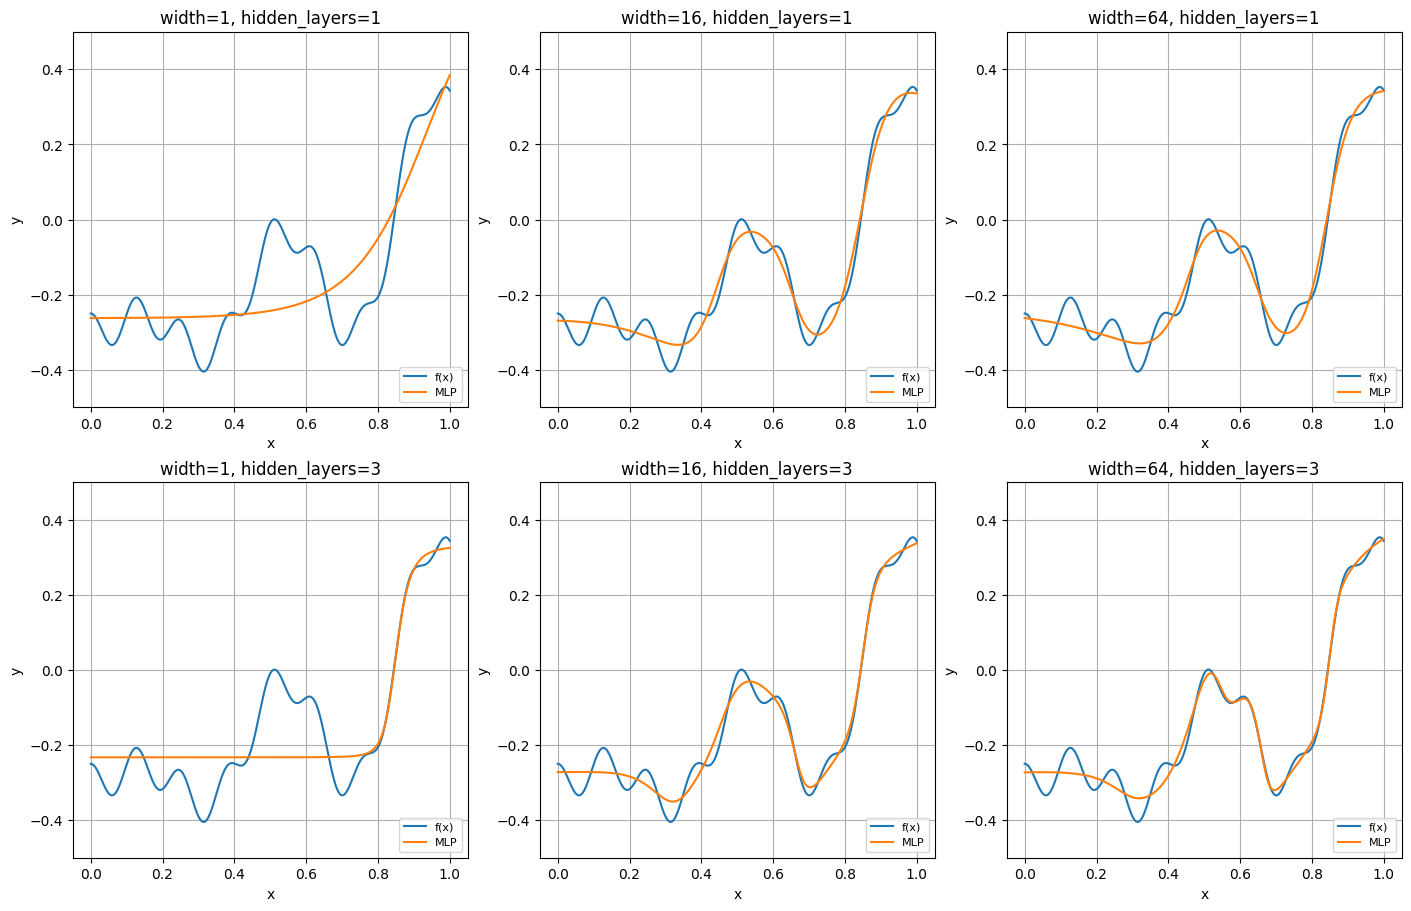

In [6]:
# _, arr = plt.subplots(2, 3, figsize=(15, 10))

fig, axes = plt.subplots(2, 3, figsize=(14, 9), constrained_layout=True)
axes = axes.ravel()
for ax, (w, h) in zip(axes, settings):
  ax.plot(x, fs, label="f(x)")
  ax.plot(x, y_preds[(w, h)], label="MLP")
  ax.set_ylim([-0.5, 0.5])
  ax.grid(True)
  ax.set_title(f"width={w}, hidden_layers={h}")
  ax.set_xlabel("x"); ax.set_ylabel("y")
  ax.legend(loc="lower right", fontsize=8)
plt.show()


As width and depth increase, the MLP’s ability to capture both the global quadratic trend and the high-frequency wiggles improves noticeably. With width = 1, the model has too little capacity and mostly fits a smooth baseline, missing oscillations. Holding depth fixed, going from width = 1 to 64 reduces bias and tracks the mid/high-frequency components much better. Increasing depth from 1 to 3 further improves expressivity and smoothness control; the (width ≥ 16, depth = 3) models are the closest to the target across the interval. Overall, the best trade-off here is width = 64 with 3 hidden layers, which closely matches the peaks and troughs without obvious overfitting on this noiseless function.